11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 - 7s - 4ms/step - accuracy: 0.9269 - loss: 0.2568
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


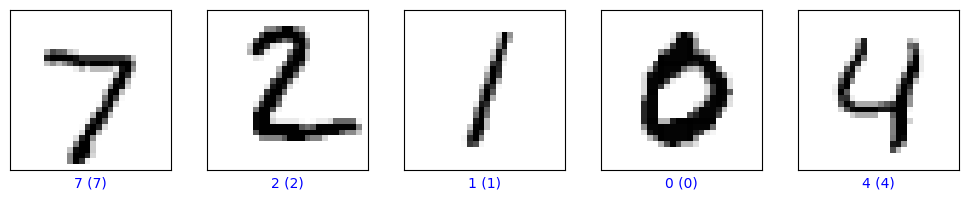

In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test / 255.0  # Normalize images to [0, 1] range

# Load a pre-trained model or create one
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (optional; using pre-trained weights is faster)
model.fit(x_train / 255.0, y_train, epochs=1, verbose=2)

# Make predictions
predictions = model.predict(x_test)

# Plotting parameters
num_images = 5  # Number of images to display
num_rows = 1    # Number of rows in the grid
num_cols = num_images  # Number of columns based on images

# Function to plot image
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Plotting loop
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, y_test, x_test)

plt.tight_layout()
plt.show()

Training ResNet-18...
Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 719s 9s/step - accuracy: 0.5981 - loss: 1.6939 - val_accuracy: 0.1085 - val_loss: 2.5032
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 677s 8s/step - accuracy: 0.9555 - loss: 0.1438 - val_accuracy: 0.1715 - val_loss: 2.9039
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 673s 8s/step - accuracy: 0.9724 - loss: 0.0851 - val_accuracy: 0.1975 - val_loss: 3.4727
Finished training ResNet-18.
Training DenseNet-121...
Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.7916 - loss: 0.6510 - val_accuracy: 0.1170 - val_loss: 2.6055
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9733 - loss: 0.0822 - val_accuracy: 0.1170 - val_loss: 3.9324
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9700 - loss: 0.1019 - val_accuracy: 0.1170 - val_loss: 8.9651
Finished training DenseNet-121.
Training Vision Transformer...
Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.1328 - loss: 2.9352 - val_accuracy: 0.231

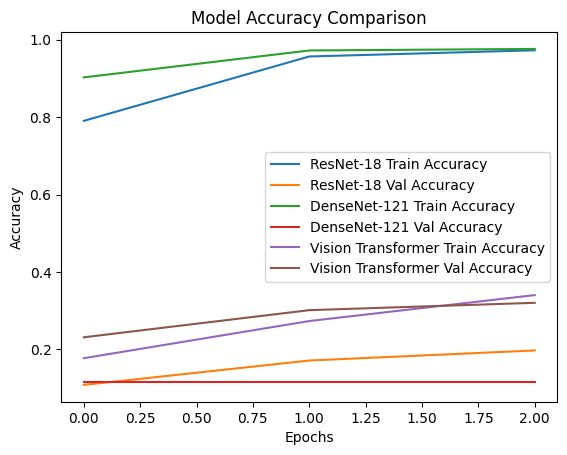

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Resize MNIST images to 32x32 for ResNet and DenseNet
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

# Subset the data for faster execution
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]
x_test_small = x_test[:2000]
y_test_small = y_test[:2000]
x_train_resized_small = x_train_resized[:10000]
x_test_resized_small = x_test_resized[:2000]

# Model for ResNet-18 (using ResNet50 as a base)
def resnet18_model(input_shape=(32, 32, 1), num_classes=10):
    base_model = ResNet50(weights=None, include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    output = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    return model

# Model for DenseNet-121
def densenet121_model(input_shape=(32, 32, 1), num_classes=10):
    base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    output = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    return model

# Vision Transformer (ViT-Base) Model
def vision_transformer(input_shape=(28, 28, 1), num_classes=10):
    patch_size = 4
    num_patches = (input_shape[0] // patch_size) ** 2
    projection_dim = 64
    transformer_units = [128, 64]
    num_heads = 4
    num_layers = 8

    inputs = layers.Input(shape=input_shape)
    patches = layers.Conv2D(filters=projection_dim, kernel_size=patch_size, strides=patch_size)(inputs)
    patches = layers.Reshape((num_patches, projection_dim))(patches)

    # Transformer Encoder
    for _ in range(num_layers):
        x = layers.LayerNormalization()(patches)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x, x)
        x = layers.Add()([x, patches])

        patches = layers.LayerNormalization()(x)
        patches = layers.Dense(transformer_units[0], activation='relu')(patches)
        patches = layers.Dense(transformer_units[1], activation='relu')(patches)
        patches = layers.Add()([patches, x])

    x = layers.GlobalAveragePooling1D()(patches)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Compile and train each model on the smaller dataset
models_dict = {
    "ResNet-18": resnet18_model(),
    "DenseNet-121": densenet121_model(),
    "Vision Transformer": vision_transformer()
}

history = {}
for model_name, model in models_dict.items():
    print(f"Training {model_name}...")
    if model_name in ["ResNet-18", "DenseNet-121"]:
        train_data, test_data = x_train_resized_small, x_test_resized_small
    else:
        train_data, test_data = x_train_small, x_test_small
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    history[model_name] = model.fit(
        train_data, y_train_small, validation_data=(test_data, y_test_small), epochs=3, batch_size=128, verbose=1
    )
    print(f"Finished training {model_name}.")

# Evaluate models
results = {}
for model_name, model in models_dict.items():
    print(f"Evaluating {model_name}...")
    if model_name in ["ResNet-18", "DenseNet-121"]:
        test_data = x_test_resized_small
    else:
        test_data = x_test_small
    results[model_name] = model.evaluate(test_data, y_test_small, verbose=0)
    print(f"{model_name}: Loss = {results[model_name][0]:.4f}, Accuracy = {results[model_name][1]:.4f}")

# Plot training results
for model_name in models_dict.keys():
    plt.plot(history[model_name].history['accuracy'], label=f'{model_name} Train Accuracy')
    plt.plot(history[model_name].history['val_accuracy'], label=f'{model_name} Val Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
